# Random Forest on Mushroom dataset

In [1]:
# Importing libraries for the project
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scipy import optimize
import math

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import datasets

In [2]:
filename = 'data/encodedShroomsV2.csv'
df = pd.read_csv(filename)
df

,10010000001000000100001000000010100101000010000000010001000010001000100000000100000010001000001000100000000100,00010000001000000000101000100000100110000010000000011000000010001000100000000100000010001000001000000100000010,00000010001000010000001000010000100110000000001000011000000010001000100000000100000010001000001000000100000010,10010000010000010000001000000010100101000000001000010001000010001000100000000100000010001000001000100000000100,00010000001010000000010000000100101010000010000000100001000010001000100000000100000010001001000000000100010000,00010000010000000000101000100000100110000000001000011000000010001000100000000100000010001000001000100000000010,00000010001000010000001000100000100110100000000000011000000010001000100000000100000010001000001000100000000010,00000010010000010000001000010000100110000000001000011000000010001000100000000100000010001000001000000100000100,10010000010000010000001000000010100101000000000010010001000010001000100000000100000010001000001000100000001000,00000010001000000000101000100000100110100000000000011000000010001000100000000100000010001000001000100000000100,...,00010000001000000100010000000100010110000000000001010010000010001001000000001000000001001000001010000000001000,10001000010000000100010000001000100101000000000100100010000010100000000010000100000010001001000000010000001000.2,10001000001000001000010000000001100101000000000100100010001000001000000010000100000010001001000000010000001000.2,10001000010000000100010100000000100101000000000100100010001000001000000010000100000010001001000000010000001000.2,00001000001000000100010000000100010110000000000001010010000010001001000000001000000001001000001000000010100000,00010000001000000100010000000100010110000000000001010010000010001001000000001000000000101000001000000010001000,01000000001000000100010000000100010110000000001000010010000010001001000000001000000001001000001000000010100000,10001000010000000100010000000001100101000000000100100010000010100000100000000100000010001001000000010000001000.2,00010000001000000100010000000100010110000000000001010010000010001001000000001000000001001000001010000000100000,Unnamed: 8124


In [3]:
# initializing datasets, filling missing values with zeroes
X = np.empty((8124, 110), dtype=int)
j = 0
for column in df:
    if len(df[column].name) == 110:
        X_row = []
        for i in range(110):
            if df[column].name[i] == '1':
                X_row.append(1)
            else:
                X_row.append(0)
        X[j] = X_row
    if len(df[column].name) == 112:
        X_row = []
        for i in range(110):
            if df[column].name[i] == '1':
                X_row.append(1)
            else:
                X_row.append(0)
        X[j] = X_row
    j = j+1

In [4]:
X

array([[1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
# Column 0 is the column of the value to be predicted 
ds = pd.DataFrame(data = X)
ds

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
8120,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8121,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
8122,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [6]:
X=ds.iloc[:,1:]  # Features
y=ds.iloc[:,0]  # Labels

In [7]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: 0, dtype: int32

In [8]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,100,101,102,103,104,105,106,107,108,109
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [10]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [11]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [12]:
metrics.precision_score(y_test, y_pred)

1.0

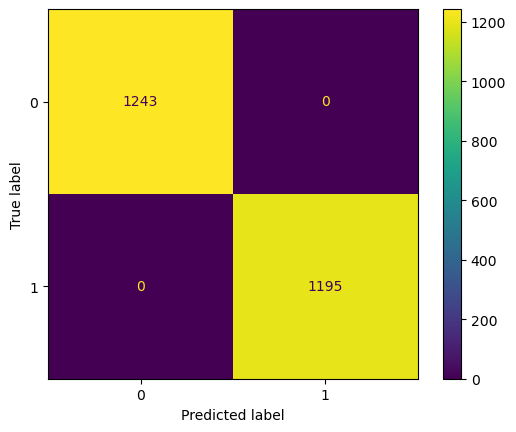

In [13]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm).plot()